# UCI Adult Data Set 

The dataset has details of 32561 people with the following 14 features:

[Census Income Dataset](https://archive.ics.uci.edu/ml/datasets/adult)

![](adult.png)

In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
warnings.filterwarnings("ignore")

In [58]:
data = pd.read_csv("adult1.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.  Explore the data by completing the following tasks?
- How many men and women (sex feature) are represented in this dataset? 

- What is the average age (age feature) of women? 

- What is the percentage of German citizens (native-country feature)?

In [3]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [4]:
data[data['sex'] == 'Female']['age'].mean()

36.85823043357163

In [5]:
(data['native-country'].value_counts()['Germany']/data.shape[0])*100

0.42074874850281013

### 2. For people who recieve more than 50K per year (salary feature), what is the mean and standard deviation of their age?  Simiarly for people who receive less than 50K per year?

In [6]:
data['salary'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [7]:
salary_more_50k = data[data['salary'] == '<=50K']

In [8]:
salary_less_50k = data[data['salary'] == '>50K']

In [9]:
salary_more_50k.describe()['age']

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [10]:
salary_less_50k.describe()['age']

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

### 3. Display the statistics of age for each gender of all the races (race feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [11]:
racial_stats_gender = data.groupby(['race', 'sex'])['age'].describe()
racial_stats_gender

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [12]:
racial_stats_gender.unstack().loc['Amer-Indian-Eskimo', ('max', 'Male')]

82.0

### 4. As computers understand only numbers, we will do some preprocessing tasks for encoding the categorical features.

- Encode Salary column such that wherever we have salary more than 50k that is '>50k' we encode it to 1 else 0. 
- One hot encode the categorical features.
- Split features and target variable into X and y respectively.

In [59]:
data['salary'].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [102]:
# data['salary'].replace('<=50K', 0, inplace=True)

# data['salary'].replace('>50K', 1, inplace=True)

In [103]:
data['salary'] = data['salary'].apply(lambda x : 1 if x == '>50K' else 0)

In [62]:
data['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [63]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [64]:
X = pd.get_dummies(data, drop_first=True)

In [65]:
X = X.drop(columns='salary')

In [66]:
y = data['salary']

### 5. Perform the following operation on dataset.
- Split the data X and y into X_train,X_test,y_train and y_test in the ratio 70:30
- Further split the training data into train and validation in 80:20 ratio
- Then apply the base Decision Tree Classifier model and calculate the accuracy on validation data as well as on test data.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=40)

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=20, random_state=40)

In [94]:
(X_train.shape[0] + X_val.shape[0] + X_test.shape[0], data.shape[0])

(32561, 32561)

### 6. Perform ensembling using the models Decision Tree Classifier and Logistic Regression, using a VotingClassifier keeping the parameter voting as `soft` and the calculate the accuracy.

In [81]:
dt = DecisionTreeClassifier()
logreg = LogisticRegression()

In [82]:
estimator = [('Logistic', logreg), ('Decision Tree', logreg)]

In [83]:
voting_cls = VotingClassifier(estimator, voting='soft')

In [84]:
voting_cls.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Decision Tree',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
            

In [85]:
y_pred = voting_cls.predict(X_test)

In [86]:
voting_cls.score(X_test, y_test)

0.8

## What is the Effect of adding more trees

- Train 3 different ensemble classifiers in the form of gradient boosted trees. Train models with 10, 50 and  100 trees.Use the n_estimators parameter in the boosted tree module.

- n-estimators:
    - The number of sequential trees to be modeled 
    - Though GBM is fairly robust at higher number of trees but it can still overfit at a point.

- Let's get sarted with a model with n_estimators = 10 and max_depth=6:


```python
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6).fit(X_train, y_train)
```

### 7. Perform the following Boosting task on below two models.

- Train two models with 
```python
A) n_estimators = 50 & max_depth = 6
B) n_estimators =100 & max_depth= 6
```
- Calculate the accuracy on validation data and testing data.

**Things to ponder**

- Which model has the best accuracy on the validation data?
- Is it always true that the model with the most trees will perform best on validation data?

In [89]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6)

model_10.fit(X_train, y_train)

model_10.score(X_val, y_val)

0.95

In [90]:
model_10.score(X_test, y_test)

0.8333333333333334

In [91]:
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6)

model_50.fit(X_train, y_train)

model_50.score(X_val, y_val), model_50.score(X_test, y_test)

(0.9, 0.8666666666666667)

In [92]:
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6)

model_100.fit(X_train, y_train)

model_100.score(X_val, y_val), model_100.score(X_test, y_test)

(0.95, 0.9)

### 8. Based on the best gradient boosting classifier you found in the previous task, plot a bar plot of the model's top 10 features with it's feature importance score

In [100]:
best_features = pd.DataFrame({'Feature' : X_train.columns, 'Feature_Importance' : model_100.feature_importances_})

In [107]:
best_features.sort_values(by='Feature_Importance', ascending=False, inplace=True)

In [116]:
best_features

,Feature,Feature_Importance
30,marital-status_Married-civ-spouse,0.351647
3,capital-gain,0.192221
2,education-num,0.184771
4,capital-loss,0.063076
0,age,0.058392
5,hours-per-week,0.037237
1,fnlwgt,0.020089
38,occupation_Exec-managerial,0.016204
44,occupation_Prof-specialty,0.008551
11,workclass_Self-emp-not-inc,0.006201


In [111]:
best_features.head(10)

,Feature,Feature_Importance
30,marital-status_Married-civ-spouse,0.351647
3,capital-gain,0.192221
2,education-num,0.184771
4,capital-loss,0.063076
0,age,0.058392
5,hours-per-week,0.037237
1,fnlwgt,0.020089
38,occupation_Exec-managerial,0.016204
44,occupation_Prof-specialty,0.008551
11,workclass_Self-emp-not-inc,0.006201


In [112]:
top_10_best_best_features = best_features.iloc[ : 10, : ]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

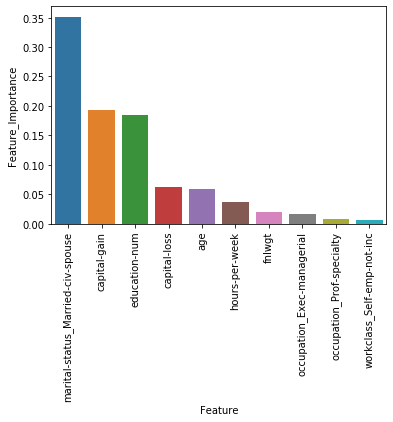

In [115]:
sns.barplot(x='Feature', y = 'Feature_Importance', data=top_10_best_best_features)
plt.xticks(rotation=90)

### 9. Plot the training and testing error vs. number of trees

- Steps to follow:

**Step 1: Calculate the classification error for model on the training data (train_data).**

**Step 2: Store the training errors into a list (called training_errors) that looks like this:**

```python 
[train_err_10, train_err_50, train_err_100]
```
**Step 3: Calculate the classification error of each model on the validation data (validation_data).**

**Step 4: Store the validation classification error into a list (called validation_errors) that looks like this:**

```python
[validation_err_10, validation_err_50,validation_err_100]
```
**Step 5: Calculate the classification error of each model on the test data (test_data).**

**Step 6: Store the testing classification error into a list (called testing_errors) that looks like this:**
```python
[testing_err_10, testing_err_50,testing_err_100]
```

**Things to ponder**

- Does the training error reduce as the number of trees increases?Is it always true that the validation error will reduce as the number of trees increases?